Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

### Data Quality Summary

1. Missing Data found in last_name, DOB, job_title, job_industry_category columns.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import feature_engine

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

from feature_engine import missing_data_imputers as mdi

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("newcustomer.csv",parse_dates=['DOB'])

In [3]:
df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-12-07,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-07-10,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,1954-05-10,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [5]:
df.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [6]:
df.columns

Index(['first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode', 'state', 'country', 'property_valuation', 'Rank', 'Value'], dtype='object')

In [7]:
df["first_name"].nunique()

940

In [8]:
df["first_name"].value_counts()

Mandie      3
Rozamond    3
Dorian      3
Bartram     2
Elvira      2
           ..
Tobias      1
Skipp       1
Frieda      1
Hersh       1
Logan       1
Name: first_name, Length: 940, dtype: int64

In [9]:
df["last_name"].nunique()

961

In [10]:
df["last_name"].value_counts()

Eade         2
Shoesmith    2
Hallt        2
Sturch       2
Borsi        2
            ..
McAmish      1
Stockport    1
Line         1
Margram      1
Yakutin      1
Name: last_name, Length: 961, dtype: int64

In [11]:
df["gender"].nunique()

3

In [12]:
df["gender"].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [13]:
df["past_3_years_bike_related_purchases"].nunique()

100

In [14]:
df["past_3_years_bike_related_purchases"].value_counts()

60    20
59    18
70    17
42    17
37    16
      ..
19     5
9      5
92     5
85     4
20     3
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [15]:
df["DOB"].nunique()

958

In [16]:
df["DOB"].value_counts()

1987-01-15    2
1994-04-15    2
1945-11-06    2
1951-04-30    2
1955-11-25    2
             ..
1996-01-21    1
1976-08-24    1
1983-11-02    1
1959-07-10    1
1974-03-25    1
Name: DOB, Length: 958, dtype: int64

In [17]:
df["DOB"].min()

Timestamp('1938-02-09 00:00:00')

In [18]:
df["DOB"].max()

Timestamp('2002-04-01 00:00:00')

In [19]:
df["job_title"].nunique()

184

In [20]:
df["job_title"].value_counts()

Associate Professor              15
Software Consultant              14
Environmental Tech               14
Chief Design Engineer            13
Cost Accountant                  12
                                 ..
Human Resources Assistant I       1
Media Manager I                   1
Computer Systems Analyst IV       1
Engineer II                       1
Human Resources Assistant III     1
Name: job_title, Length: 184, dtype: int64

In [21]:
df["job_industry_category"].nunique()

9

In [22]:
df["job_industry_category"].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [23]:
df["wealth_segment"].nunique()

3

In [24]:
df["wealth_segment"].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [25]:
df["deceased_indicator"].nunique()

1

In [26]:
df["deceased_indicator"].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

In [27]:
df["owns_car"].nunique()

2

In [28]:
df["owns_car"].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

In [29]:
df["tenure"].nunique()

23

In [30]:
df["tenure"].value_counts()

9     79
13    74
11    68
10    63
12    61
7     60
5     60
17    59
15    58
8     55
14    54
16    49
6     45
18    36
4     36
19    34
3     26
21    24
20    22
2     15
22    12
1      8
0      2
Name: tenure, dtype: int64

In [31]:
df["address"].nunique()

1000

In [32]:
df["address"].value_counts()

4 Mallory Pass            1
069 Hoard Pass            1
91281 Transport Center    1
3682 Crowley Point        1
98 Shoshone Road          1
                         ..
8350 Moulton Terrace      1
3653 Steensland Road      1
99376 Namekagon Street    1
4 Bluestem Pass           1
4 Fordem Avenue           1
Name: address, Length: 1000, dtype: int64

In [33]:
df["postcode"].nunique()

522

In [34]:
df["postcode"].value_counts()

2232    9
2145    9
2168    7
2750    7
3029    7
       ..
4408    1
2151    1
4159    1
3121    1
3051    1
Name: postcode, Length: 522, dtype: int64

In [35]:
df["state"].nunique()

3

In [36]:
df["state"].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [37]:
df["country"].nunique()

1

In [38]:
df["country"].value_counts()

Australia    1000
Name: country, dtype: int64

In [39]:
df["property_valuation"].nunique()

12

In [40]:
df["property_valuation"].value_counts()

9     173
8     162
7     138
10    116
6      70
11     62
5      57
4      53
3      51
12     46
2      42
1      30
Name: property_valuation, dtype: int64

In [41]:
df["Rank"].nunique()

324

In [42]:
df["Rank"].value_counts()

760     13
259     12
455      9
904      9
386      9
        ..
785      1
773      1
754      1
355      1
1000     1
Name: Rank, Length: 324, dtype: int64

In [43]:
df["Value"].nunique()

319

In [44]:
df["Value"].value_counts()

0.637500    13
1.062500    12
0.900000    11
0.945625     9
0.892500     9
            ..
1.155469     1
0.501500     1
0.535500     1
0.818125     1
0.799000     1
Name: Value, Length: 319, dtype: int64

### Data Visualization

### Univariate Data Exploration

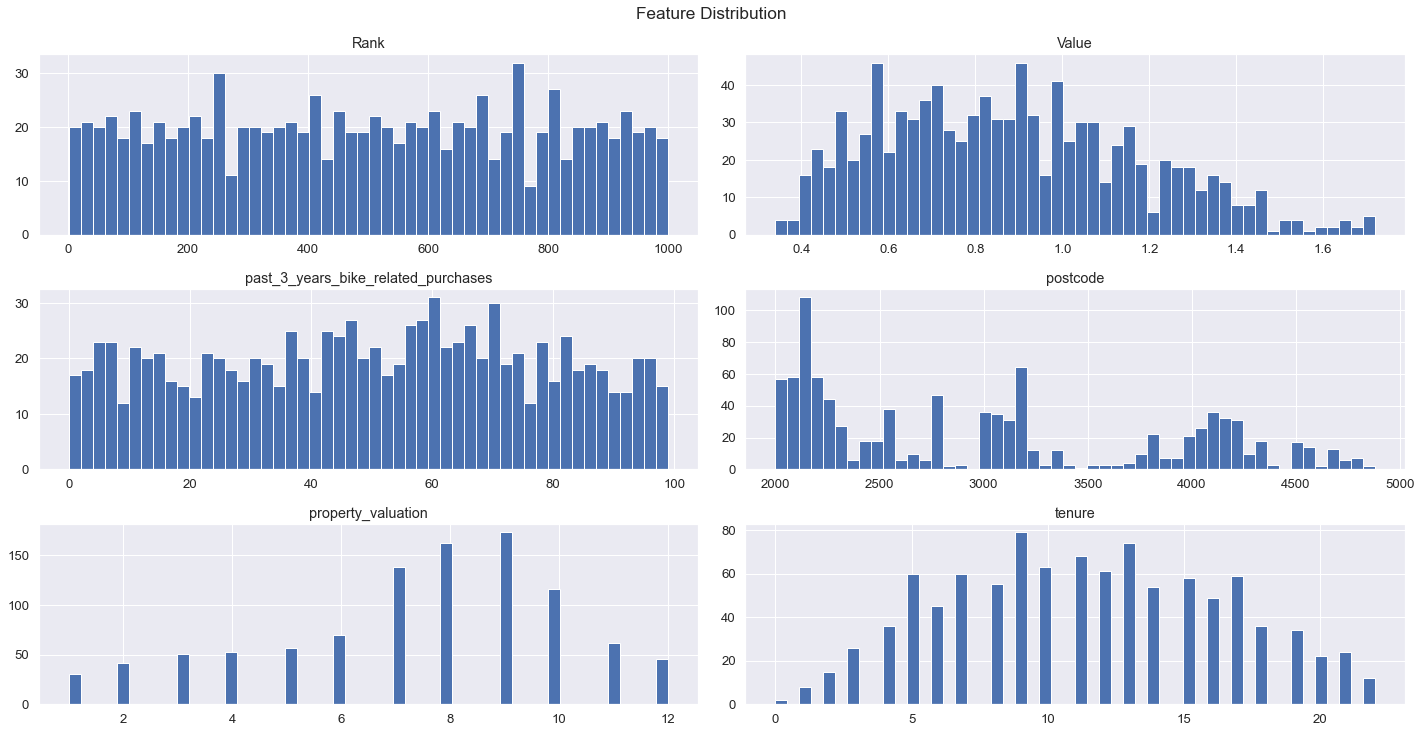

In [45]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

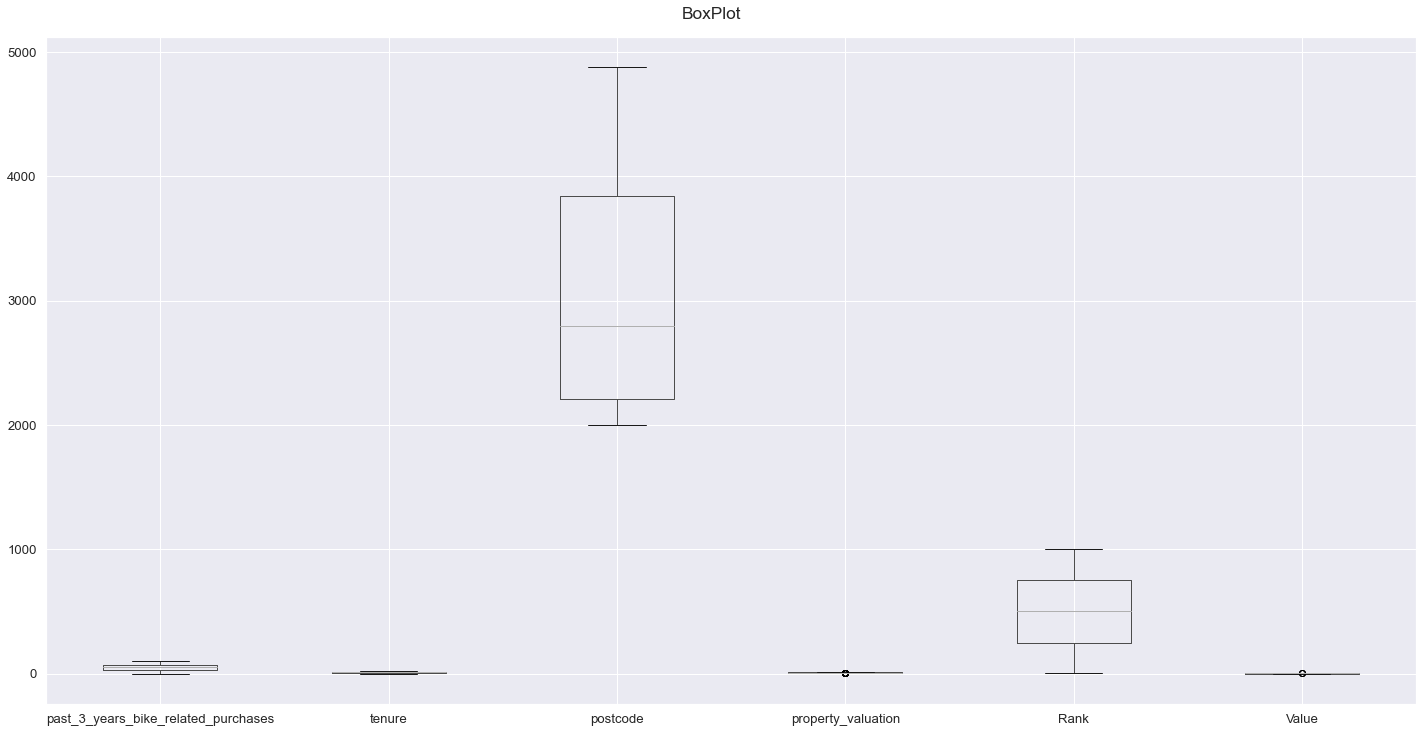

In [46]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

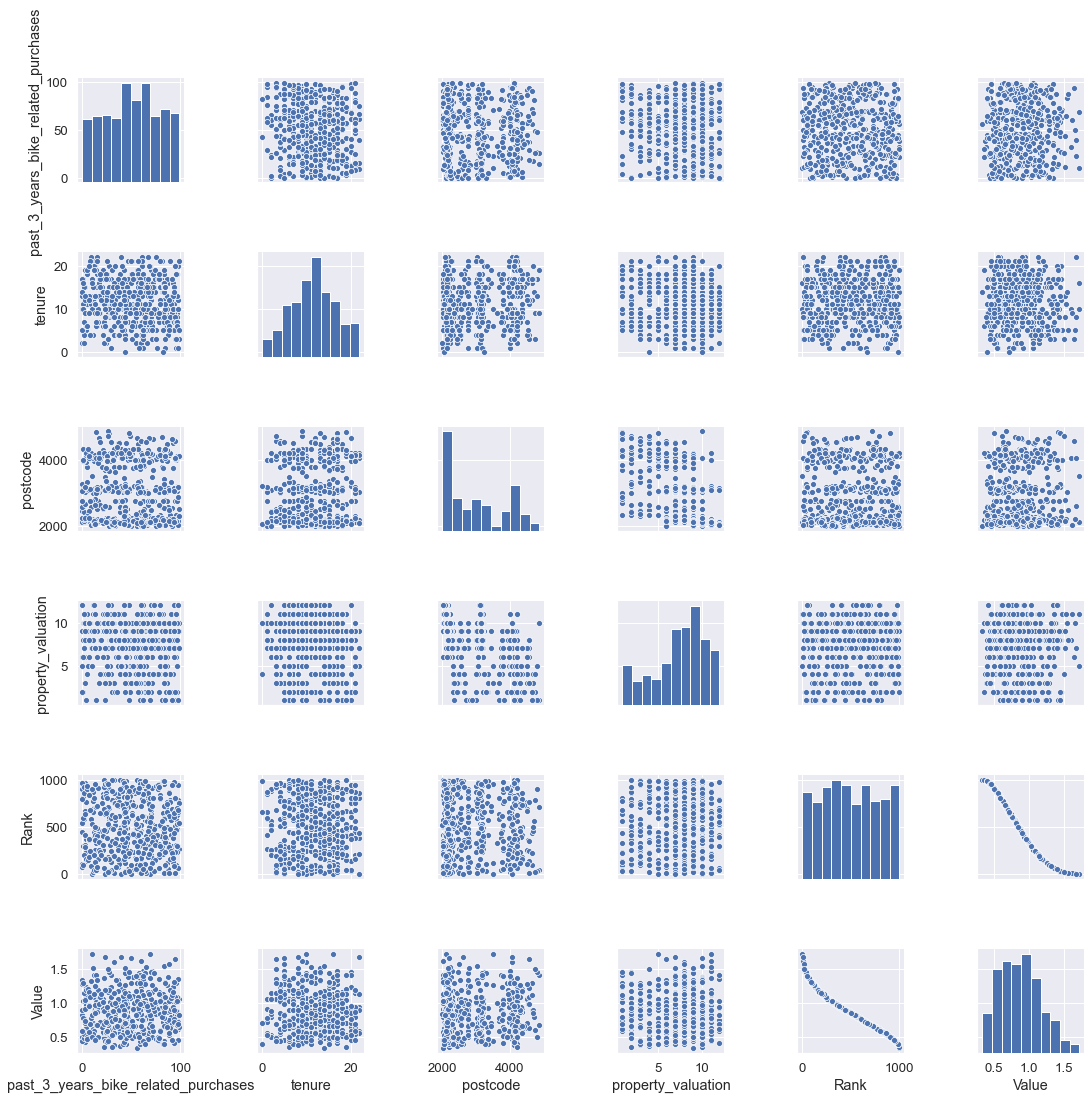

In [47]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df.sample(500))
plt.show()

### Correlation

In [48]:
df.corr()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
past_3_years_bike_related_purchases,1.000000,-0.034183,0.015208,-0.010833,-0.004392,0.004884
tenure,-0.034183,1.000000,0.030573,-0.014913,0.005546,-0.012257
postcode,0.015208,0.030573,1.000000,-0.496725,-0.050190,0.055851
property_valuation,-0.010833,-0.014913,-0.496725,1.000000,0.016385,-0.014700
Rank,-0.004392,0.005546,-0.050190,0.016385,1.000000,-0.984093
Value,0.004884,-0.012257,0.055851,-0.014700,-0.984093,1.000000


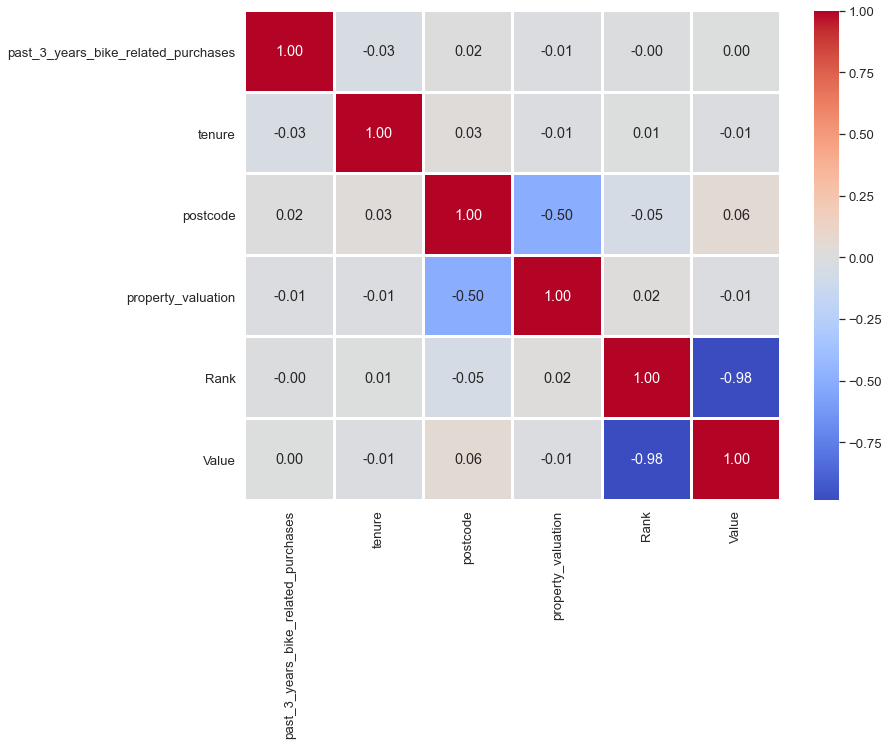

In [49]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Drop columns

In [50]:
df.columns

Index(['first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode', 'state', 'country', 'property_valuation', 'Rank', 'Value'], dtype='object')

In [51]:
df.drop(['first_name', 'last_name', 'job_title', 'deceased_indicator','address',
         'postcode','country','Rank', 'Value'],axis=1,inplace=True)

In [52]:
df

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,Male,86,1957-12-07,Manufacturing,Mass Customer,Yes,14,QLD,6
1,Male,69,1970-03-22,Property,Mass Customer,No,16,NSW,11
2,Female,10,1974-08-28,Financial Services,Affluent Customer,No,10,VIC,5
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,5,QLD,1
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,NSW,9
...,...,...,...,...,...,...,...,...,...
995,Male,60,1959-07-10,Financial Services,Affluent Customer,No,9,NSW,7
996,Male,22,2001-10-17,Health,Mass Customer,No,6,NSW,10
997,Female,17,1954-05-10,Financial Services,Affluent Customer,Yes,15,QLD,2
998,Male,30,1952-12-17,Financial Services,Mass Customer,Yes,19,QLD,2


In [53]:
df['year'] = df["DOB"].dt.year

In [54]:
df

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,year
0,Male,86,1957-12-07,Manufacturing,Mass Customer,Yes,14,QLD,6,1957.0
1,Male,69,1970-03-22,Property,Mass Customer,No,16,NSW,11,1970.0
2,Female,10,1974-08-28,Financial Services,Affluent Customer,No,10,VIC,5,1974.0
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,5,QLD,1,1979.0
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,NSW,9,1965.0
...,...,...,...,...,...,...,...,...,...,...
995,Male,60,1959-07-10,Financial Services,Affluent Customer,No,9,NSW,7,1959.0
996,Male,22,2001-10-17,Health,Mass Customer,No,6,NSW,10,2001.0
997,Female,17,1954-05-10,Financial Services,Affluent Customer,Yes,15,QLD,2,1954.0
998,Male,30,1952-12-17,Financial Services,Mass Customer,Yes,19,QLD,2,1952.0


In [55]:
df['age'] = 2020 - df['year']

In [56]:
df

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,year,age
0,Male,86,1957-12-07,Manufacturing,Mass Customer,Yes,14,QLD,6,1957.0,63.0
1,Male,69,1970-03-22,Property,Mass Customer,No,16,NSW,11,1970.0,50.0
2,Female,10,1974-08-28,Financial Services,Affluent Customer,No,10,VIC,5,1974.0,46.0
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,5,QLD,1,1979.0,41.0
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,NSW,9,1965.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...
995,Male,60,1959-07-10,Financial Services,Affluent Customer,No,9,NSW,7,1959.0,61.0
996,Male,22,2001-10-17,Health,Mass Customer,No,6,NSW,10,2001.0,19.0
997,Female,17,1954-05-10,Financial Services,Affluent Customer,Yes,15,QLD,2,1954.0,66.0
998,Male,30,1952-12-17,Financial Services,Mass Customer,Yes,19,QLD,2,1952.0,68.0


In [57]:
df.drop(['DOB', 'year'],axis=1,inplace=True)

In [58]:
df

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,6,63.0
1,Male,69,Property,Mass Customer,No,16,NSW,11,50.0
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,5,46.0
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,41.0
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,9,55.0
...,...,...,...,...,...,...,...,...,...
995,Male,60,Financial Services,Affluent Customer,No,9,NSW,7,61.0
996,Male,22,Health,Mass Customer,No,6,NSW,10,19.0
997,Female,17,Financial Services,Affluent Customer,Yes,15,QLD,2,66.0
998,Male,30,Financial Services,Mass Customer,Yes,19,QLD,2,68.0


### Treat Missing Values

In [59]:
df.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
state                                    0
property_valuation                       0
age                                     17
dtype: int64

In [60]:
imputer = mdi.MeanMedianImputer(imputation_method='median', variables=['age'])

In [61]:
imputer.fit(df)

MeanMedianImputer(variables=['age'])

In [62]:
df2 = imputer.transform(df)

In [63]:
df2

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,6,63.0
1,Male,69,Property,Mass Customer,No,16,NSW,11,50.0
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,5,46.0
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,41.0
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,9,55.0
...,...,...,...,...,...,...,...,...,...
995,Male,60,Financial Services,Affluent Customer,No,9,NSW,7,61.0
996,Male,22,Health,Mass Customer,No,6,NSW,10,19.0
997,Female,17,Financial Services,Affluent Customer,Yes,15,QLD,2,66.0
998,Male,30,Financial Services,Mass Customer,Yes,19,QLD,2,68.0


In [64]:
df2.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
state                                    0
property_valuation                       0
age                                      0
dtype: int64

In [65]:
df2.isnull().mean()

gender                                 0.000
past_3_years_bike_related_purchases    0.000
job_industry_category                  0.165
wealth_segment                         0.000
owns_car                               0.000
tenure                                 0.000
state                                  0.000
property_valuation                     0.000
age                                    0.000
dtype: float64

In [66]:
df2['job_industry_category'].fillna('Missing', inplace=True)

In [67]:
df2

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,6,63.0
1,Male,69,Property,Mass Customer,No,16,NSW,11,50.0
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,5,46.0
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,41.0
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,9,55.0
...,...,...,...,...,...,...,...,...,...
995,Male,60,Financial Services,Affluent Customer,No,9,NSW,7,61.0
996,Male,22,Health,Mass Customer,No,6,NSW,10,19.0
997,Female,17,Financial Services,Affluent Customer,Yes,15,QLD,2,66.0
998,Male,30,Financial Services,Mass Customer,Yes,19,QLD,2,68.0


In [68]:
df2.isnull().mean()

gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_industry_category                  0.0
wealth_segment                         0.0
owns_car                               0.0
tenure                                 0.0
state                                  0.0
property_valuation                     0.0
age                                    0.0
dtype: float64

### Treat Duplicate Values

In [69]:
df2.duplicated(keep='first').sum()

0

### Treat Outliers

In [70]:
df2.describe()

,past_3_years_bike_related_purchases,tenure,property_valuation,age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,7.397000,49.186000
std,27.796686,5.037145,2.758804,16.929087
min,0.000000,0.000000,1.000000,18.000000
25%,26.750000,7.000000,6.000000,37.750000
50%,51.000000,11.000000,8.000000,48.000000
75%,72.000000,15.000000,9.000000,63.000000
max,99.000000,22.000000,12.000000,82.000000


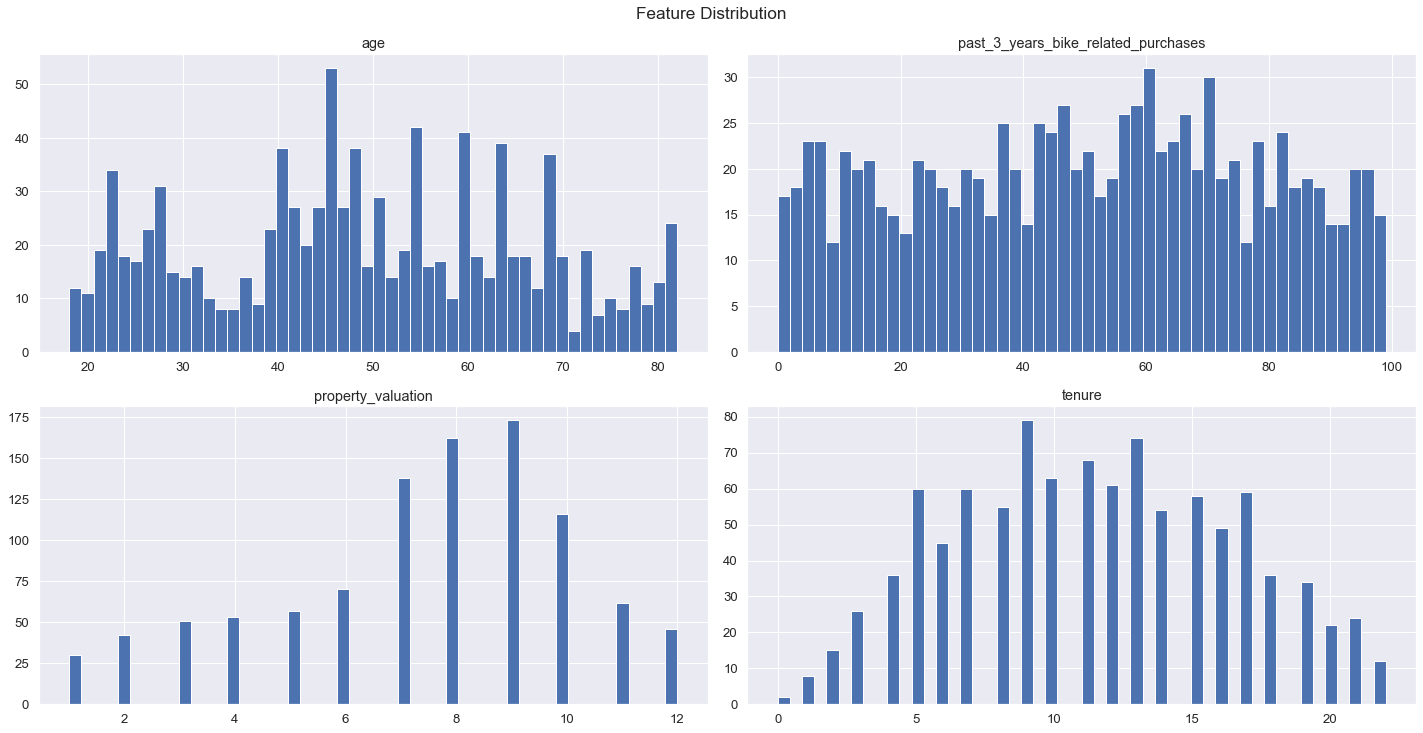

In [71]:
df2.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [72]:
df2.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'state', 'property_valuation', 'age'], dtype='object')

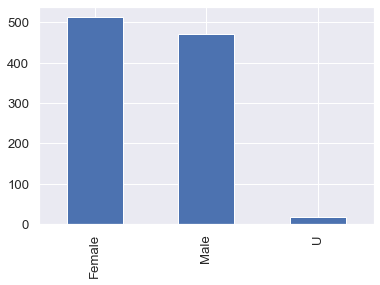

In [73]:
df2['gender'].value_counts().plot(kind='bar')
plt.show()

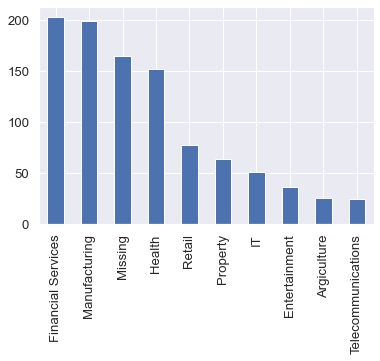

In [74]:
df2['job_industry_category'].value_counts().plot(kind='bar')
plt.show()

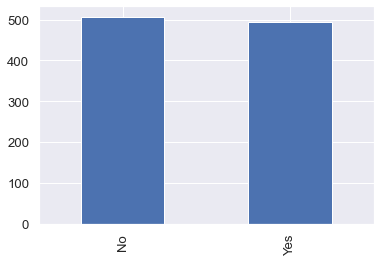

In [75]:
df2['owns_car'].value_counts().plot(kind='bar')
plt.show()

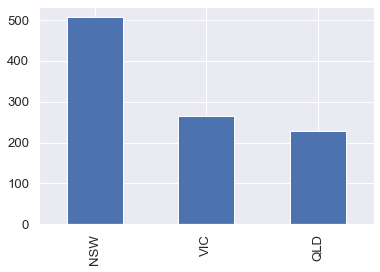

In [76]:
df2['state'].value_counts().plot(kind='bar')
plt.show()

### Save a new file

In [77]:
#df2.to_csv("custcluster.csv",index=False)

### One hot encoding

In [78]:
df2.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,6,63.0
1,Male,69,Property,Mass Customer,No,16,NSW,11,50.0
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,5,46.0
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,41.0
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,9,55.0


In [79]:
df2.dtypes

gender                                  object
past_3_years_bike_related_purchases      int64
job_industry_category                   object
wealth_segment                          object
owns_car                                object
tenure                                   int64
state                                   object
property_valuation                       int64
age                                    float64
dtype: object

In [81]:
df3 = pd.get_dummies(df2, drop_first=True)

In [82]:
df3

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
0,86,14,6,63.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0
1,69,16,11,50.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,10,10,5,46.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,64,5,1,41.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,34,19,9,55.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,9,7,61.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,22,6,10,19.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
997,17,15,2,66.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
998,30,19,2,68.0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0


In [83]:
#df3.to_csv("custcluster2.csv",index=False)